53.76
12.494337543982883
0.012878506600408847
53.82201539873733 mins
12.779200625668619
0.0009454578331974576
12.218898192702062 hrs


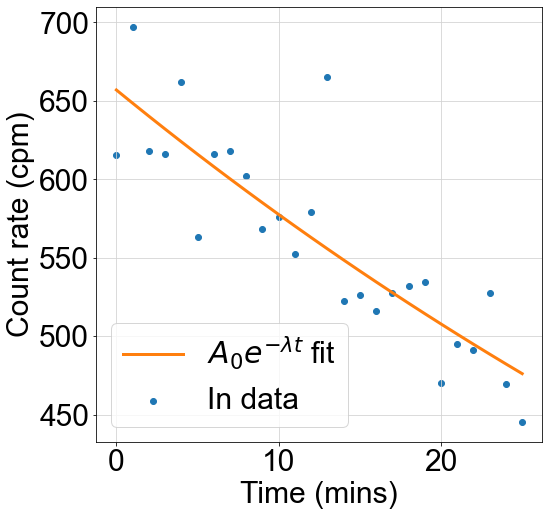

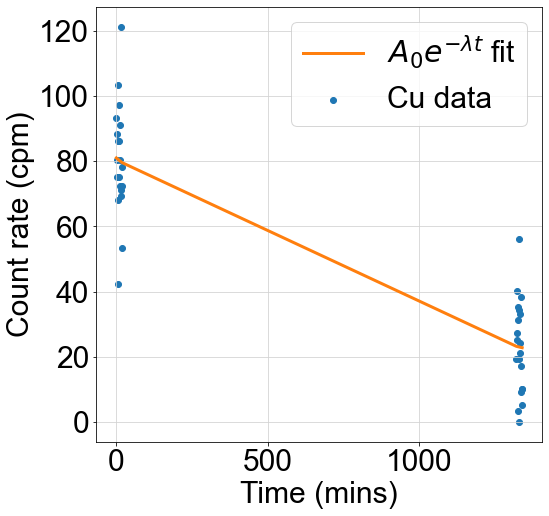

In [175]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
import pandas as pd
from matplotlib.pyplot import figure
import matplotlib
from scipy.signal import find_peaks
from scipy.optimize import curve_fit
from scipy.stats import chisquare

%matplotlib inline

font = {'family' : 'Arial',
        'weight' : 'normal',
        'size'   : 30
       }
matplotlib.rc('font', **font)

def model_exp(t,A0,b):
    return A0*np.exp(-b*t)

def exp_fit(xdata,ydata):
    popt,pcov = curve_fit(model_exp,xdata,ydata,p0=[np.max(ydata),0.0009096])
    perr = np.sqrt(np.diag(pcov))
    print(perr[1]/popt[1]*100)
    return popt


bkg=np.mean(np.genfromtxt('D:/Desktop/nathan-naa/bkg.txt'))
bkg=bkg-5
print(bkg)

In116=np.genfromtxt('D:/Desktop/nathan-naa/In116.txt')-bkg
In116[In116<0] = 0
In_t=np.arange(0,len(In116))

fit1=exp_fit(In_t,In116)
figure(1,figsize=(8,8))
plt.scatter(In_t,In116,label='In data')
plt.plot(In_t,model_exp(In_t,fit1[0],fit1[1]),c='tab:orange',label=r'$A_0 e^{-\lambda t}$ fit',lw=3)
plt.xlabel('Time (mins)')
plt.ylabel('Count rate (cpm)')
plt.grid(c='lightgray')
print(fit1[1])
print(str(np.log(2)/fit1[1])+' mins')
plt.legend()

cu64=np.genfromtxt('D:/Desktop/nathan-naa/Cu64.txt')-bkg
cu64[cu64<0] = 0
cu_t=np.array([np.arange(0,20),np.arange(1302+20,1342)]).flatten()

fit1=exp_fit(cu_t,cu64)
figure(2,figsize=(8,8))
plt.scatter(cu_t,cu64,label='Cu data')
plt.plot(cu_t,model_exp(cu_t,fit1[0],fit1[1]),c='tab:orange',label=r'$A_0 e^{-\lambda t}$ fit',lw=3)
plt.xlabel('Time (mins)')
plt.ylabel('Count rate (cpm)')
plt.grid(c='lightgray')
print(fit1[1])
print(str(np.log(2)/fit1[1]/60)+' hrs')
plt.legend()




In [184]:
cu= np.genfromtxt('D:Desktop/nathan-naa/cu64.mca',skip_header=21,delimiter='\t')
co= np.genfromtxt('D:Desktop/nathan-naa/co60.mca',skip_header=21,delimiter='\t')
bkg= np.genfromtxt('D:Desktop/nathan-naa/co60_cu64_bkg.mca',skip_header=21,delimiter='\t')
in116= np.genfromtxt('D:Desktop/nathan-naa/mn54.mca',skip_header=21,delimiter='\t')

def gaus(x,a,x0,sigma):
    return a*np.exp(-(x-x0)**2/(2*sigma**2))
i=1
def gauss_fit(xdata,ydata,ind1,ind2,i):
    popt,pcov = curve_fit(gaus,xdata[ind1:ind2+1],ydata[ind1:ind2+1],p0=[np.max(ydata[ind1:ind2+1]),np.mean(xdata[ind1:ind2+1]),0.2])
    print("Mean is $("+str(np.around(popt[1],3))+" \pm "+str(np.around(popt[2],3))+')$ keV')
    plt.plot(xdata[ind1:ind2],gaus(xdata[ind1:ind2],*popt),label='Photopeak #'+str(i),lw=3)
    i=i+1

    
#co_peaks are 165 and 209 
e_range = (((chan - 164.33) * 159.3) / 44) + 1173.2

chan=np.arange(0,len(cu))

figure(1,figsize=(8,8))
plt.plot(chan,co-bkg,marker='o',lw=0,label='Co-60')
gauss_fit(chan,co-bkg,148,184,i)
i=2
gauss_fit(chan,co-bkg,202,219,i)
plt.xlim(0,232)
plt.xlabel('Channel')
plt.ylabel('Counts')
plt.grid(c='lightgray')
plt.legend()

%matplotlib qt
figure(2,figsize=(8,8))
plt.plot(e_range,cu,marker='o',lw=1)
# plt.xlim(1300,1400)
plt.xlabel('Energy (keV)')
plt.ylabel('Counts')
plt.grid(c='lightgray')
plt.ylim(bottom=0)

print(e_range[1]-e_range[0])


Mean is $(164.332 \pm 23.027)$ keV
Mean is $(210.123 \pm 10.194)$ keV
3.6204545454545496
